# Social Network Analysis II

**_1. Visualize the network data_**

**_2. Show the top five node labels with highest Between Centrality._**

**_3. Show the top five node labels with other two centrality measures:  Eigenvector Centrality and Degree Centrality_**

**1.a. loading the data and creating the network**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

#load the data
fb_G=nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [2]:
#network summary 
print(f'{nx.info(fb_G)}')

Graph with 4039 nodes and 88234 edges


(-1.1144824641942979,
 0.9992497581243516,
 -1.049103348851204,
 1.194711177945137)

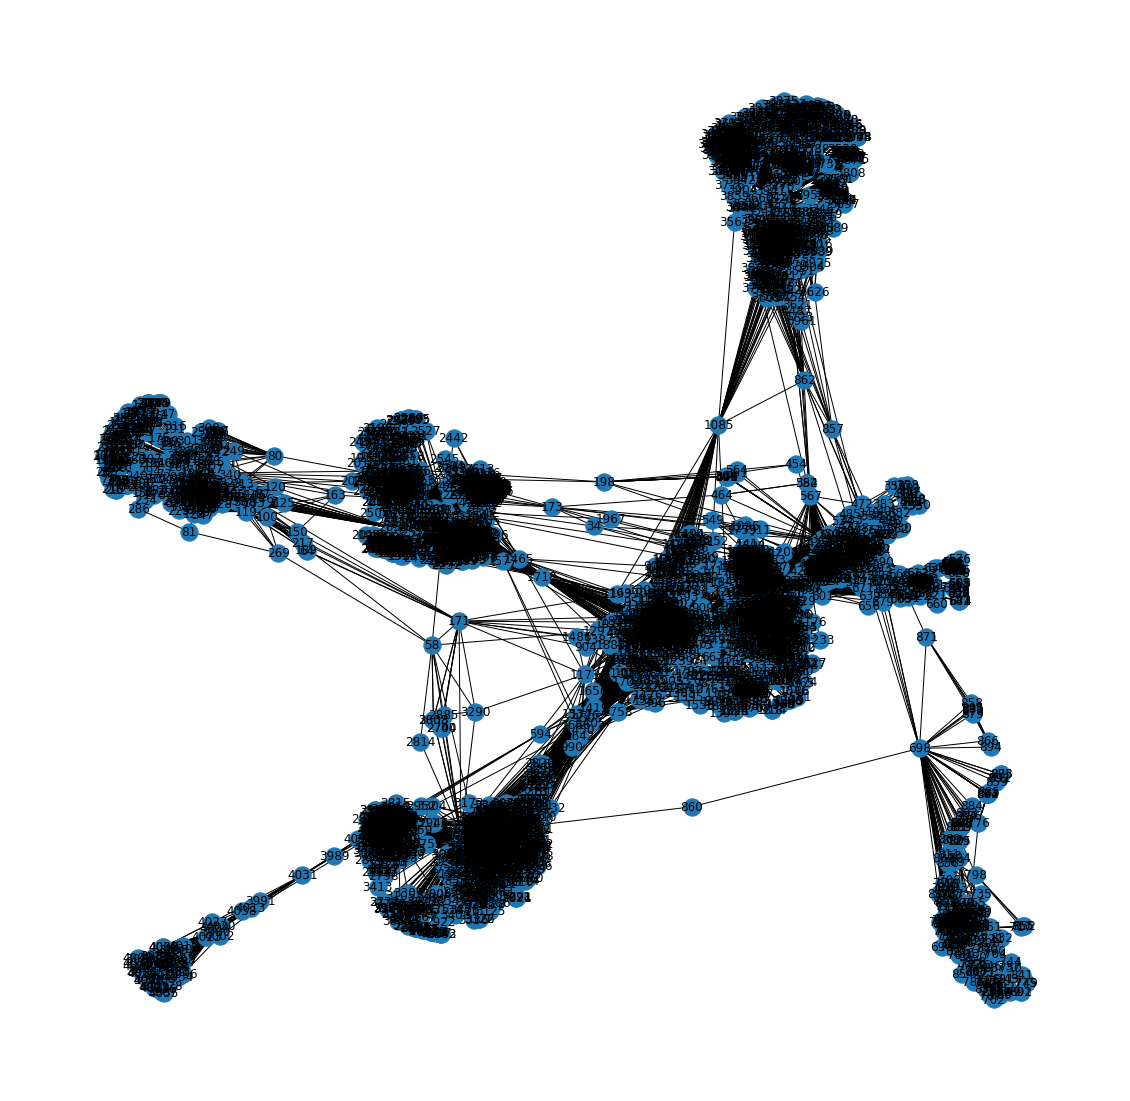

In [3]:
#visualize it
plt.figure(figsize=(20,20))
nx.draw_networkx(fb_G);
plt.axis('off')

**1.b. A much better visualization that shows centrality and node degree

(-0.9036460039019585,
 1.1808894392848015,
 -1.1337410601973534,
 0.9866714271903039)

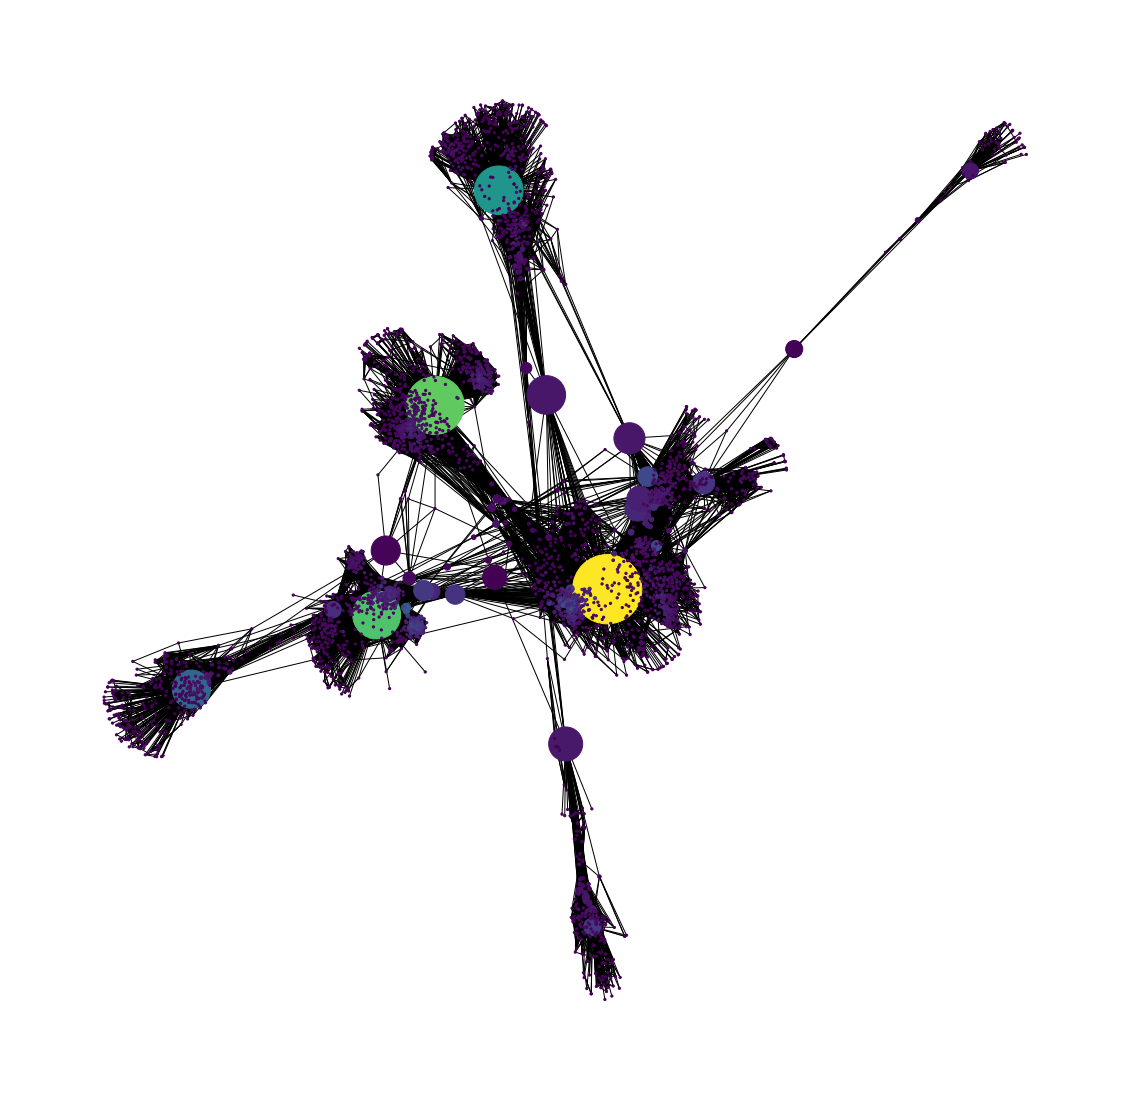

In [4]:
# Spring_Layout: a popular algorithm to position nodes
pos = nx.spring_layout(fb_G)

# Vary node size by betweenness centrality 
betCent = nx.betweenness_centrality(fb_G, normalized=True, endpoints=True)
#a simple loop to define the size of each node based on centrality
node_size =  [v * 10000 for v in betCent.values()]

# Vary color by node degree
node_color = [20000.0 * fb_G.degree(v) for v in fb_G]

#Plot the network
plt.figure(figsize=(20,20))
nx.draw_networkx(fb_G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

 **2.Top five node labels with highest Betweenness Centrality**

In [5]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]

**3.a. Top five node labels with highest Eigenvector Centrality**

In [6]:
eigenCent=nx.eigenvector_centrality(fb_G)
sorted(eigenCent, key=eigenCent.get, reverse=True)[:5]

[1912, 2266, 2206, 2233, 2464]

**3.b. Top five node labels with highest Degree Centrality**

In [7]:
degCent=nx.degree_centrality(fb_G)
sorted(degCent, key=degCent.get, reverse=True)[:5]

[107, 1684, 1912, 3437, 0]

**_So what measure should we use to determine network influencer?_**
>Eigenvector centrality is a better measure/upgraded measure of degree centrality. If you have access to eigenvector centrality, there is generally no need to consider degree centrality.

>A large Eigenvector indicates this node 1) has connected to a large number of nodes, or 2) has connected to important neighbors, or both 1) and 2). From this perspective, Eigenvector centrality is a good indicator of network influencer.

>Betweenness centrality measures the number of bing the bridge of shortest path, thus indicating how much control this node has over moving the information to other nodes. It doesn't focused on the number of nodes it connected to, unlike either degree or eigenvector centrality. Rather, it is a good indicator of network influencer about how much a node falls between others or controls flows between others.